# **1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

# **2. Polynomial Features**

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = np.array([[2,3,4]])
print(data)

[[2 3 4]]


## 2.1. Convert to 2nd degree

In [4]:
trans = PolynomialFeatures(degree=2, include_bias=False) 

# bias = intercept

In [5]:
trans.fit(data)

PolynomialFeatures(include_bias=False)

In [6]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [7]:
# OR:

trans.fit_transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

## 2.2. Convert to 3rd degree

In [8]:
trans = PolynomialFeatures(degree=3, include_bias=False) 

In [9]:
trans.fit(data)

PolynomialFeatures(degree=3, include_bias=False)

In [10]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.,  8., 12., 16., 18.,
        24., 32., 27., 36., 48., 64.]])

In [11]:
# OR:
trans.fit_transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.,  8., 12., 16., 18.,
        24., 32., 27., 36., 48., 64.]])

## 2.3. Convert to 4nd degree

In [12]:
trans = PolynomialFeatures(degree=4, include_bias=False) 

In [13]:
trans.fit(data)

PolynomialFeatures(degree=4, include_bias=False)

In [14]:
trans.transform(data)

array([[  2.,   3.,   4.,   4.,   6.,   8.,   9.,  12.,  16.,   8.,  12.,
         16.,  18.,  24.,  32.,  27.,  36.,  48.,  64.,  16.,  24.,  32.,
         36.,  48.,  64.,  54.,  72.,  96., 128.,  81., 108., 144., 192.,
        256.]])

In [15]:
# OR:
trans.fit_transform(data)

array([[  2.,   3.,   4.,   4.,   6.,   8.,   9.,  12.,  16.,   8.,  12.,
         16.,  18.,  24.,  32.,  27.,  36.,  48.,  64.,  16.,  24.,  32.,
         36.,  48.,  64.,  54.,  72.,  96., 128.,  81., 108., 144., 192.,
        256.]])

# **3. Read New Data Set**

In [16]:
df = pd.read_csv('DATASETS/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


# **4. Polynomial Converter**

In [18]:
X = df.drop('sales', axis=1)
y = df.sales

In [19]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

In [20]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [21]:
poly_features = poly_conv.transform(X)

In [22]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [23]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [24]:
np.set_printoptions(suppress=True, precision=2) # deactive scientific notation

poly_features[0]

array([  230.1 ,    37.8 ,    69.2 , 52946.01,  8697.78, 15922.92,
        1428.84,  2615.76,  4788.64])

In [25]:
poly_features.shape

(200, 9)

In [27]:
X.shape # initial shape

(200, 3)

In [28]:
X.head(3)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


In [31]:
new_df = pd.DataFrame(poly_features, columns=["TV", "radio", "newspaper", "TV^2", "TV&radio", \
                                    "TV&newspaper", "radio^2", "radio&newspaper", "newspaper^2"])

In [33]:
new_df.head(3)

,TV,radio,newspaper,TV^2,TV&radio,TV&newspaper,radio^2,radio&newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49


# **5. Train|Test Split**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# **6. Model Fitting** 

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model_poly = LinearRegression()

In [38]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model_poly.predict(X_test)

In [41]:
y_pred # predictions

array([13.95, 19.33, 12.32, 16.76,  7.9 ,  6.94, 20.13, 17.5 , 10.57,
       20.13,  9.45, 14.1 , 12.06, 23.39, 19.68,  9.16, 12.12,  9.28,
        8.45, 21.66,  7.05, 19.36, 27.27, 24.59,  9.03, 11.81, 20.43,
        9.19, 12.75,  8.64,  8.66, 20.2 , 10.94,  6.85, 18.28,  9.48,
       10.34,  9.67,  7.43, 11.04, 12.66, 10.65, 11.21,  7.46, 11.38,
       10.27,  6.16, 15.51, 13.36, 22.72, 10.4 , 13.22, 14.24, 11.87,
       11.68,  5.62, 25.04,  9.54, 17.38, 15.75])

In [43]:
my_dict = {"Actual":y_test, "pred":y_pred, "residual": y_test - y_pred }
compare = pd.DataFrame(my_dict)
compare.head()

,Actual,pred,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891


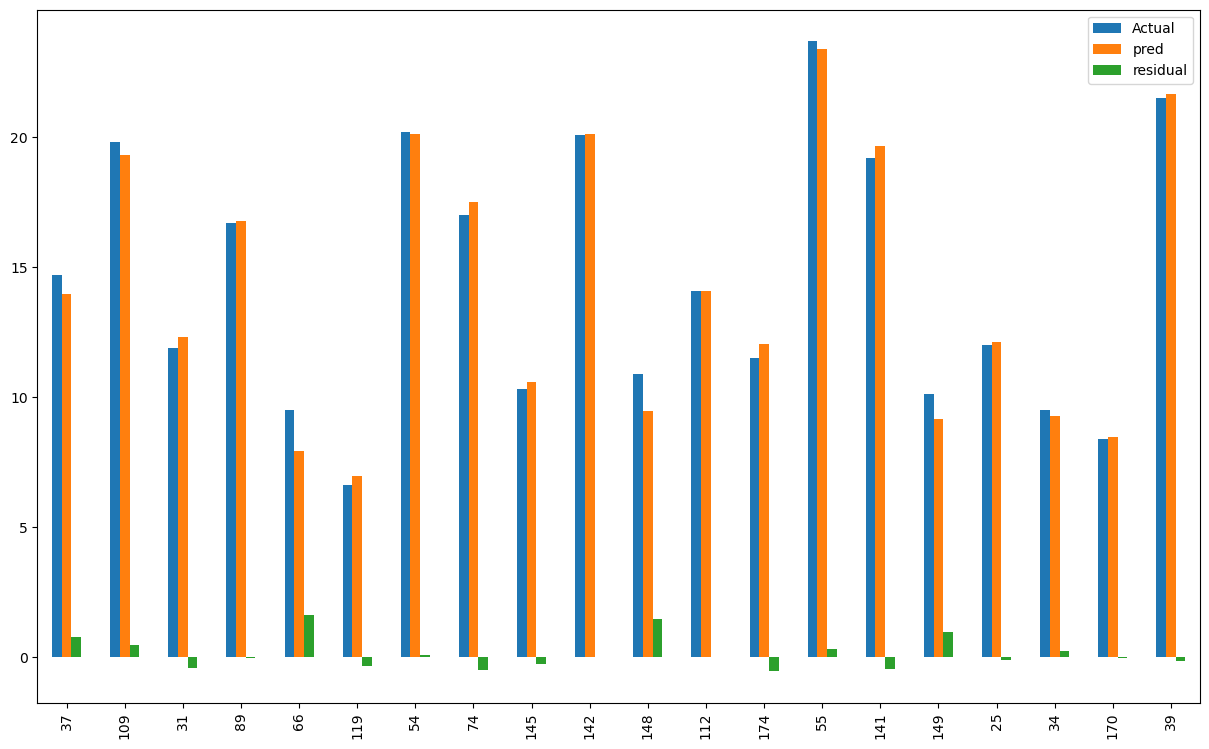

In [44]:
compare.head(20).plot(kind ="bar", figsize =(15,9))
plt.show();

# **7. Polynomail Coefficients**

In [45]:
model_poly.coef_

array([ 0.05,  0.01,  0.01, -0.  ,  0.  , -0.  ,  0.  ,  0.  , -0.  ])

In [46]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&radio", \
                                    "TV&newspaper", "radio^2", "radio&newspaper", "newspaper^2"], columns = ["coef"])

In [47]:
df_coef

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&radio,0.001142
TV&newspaper,-0.000052
radio^2,0.000033
radio&newspaper,0.000146
newspaper^2,-0.000030


In [48]:
# make prediction from first line

model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]]) 

array([21.86])

# **8. Evaluation on the Test Set**

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
y_pred = model_poly.predict(X_test)

In [51]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [52]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9843529333146789
MAE 		: 0.48967980448037096
MSE 		: 0.44175055104035904
RMSE 		: 0.6646431757269152


In [53]:
y_train_pred = model_poly.predict(X_train)

In [54]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9868638137712757
MAE 		: 0.40492481391515467
MSE 		: 0.3456939142443998
RMSE 		: 0.5879574085292232


* Simple Linear Regression:
    * MAE      : 1.213
    * RMSE     : 1.516
    * r2_score : 0.8609
    
----
* Polynomial 2-degree:
    * MAE      : 0.48
    * RMSE     : 0.66
    * r2_score : 0.9868

# **9. Find an Optimum Polynomial Degree**

In [ ]:
# We'll decide the optimum degree according to RMSE

In [55]:
def poly(d):   # degree derecesi içine ne yazarsam ona göre çözüm oluşturacak
    
    train_rmse_errors = []   # trains rmse değerlerin toplayacak
    test_rmse_errors = []    # test rmse değerlerin toplayacak
    number_of_features = []  # derece arttıkça feature sayısının kaça çıktığnı göreceğiz
    
    for i in range(1, d):  # 1 den kaçıncı dereceye kadar istiyorsak ona göre yazacağız
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True) 
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [56]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features
1,1.734594,1.516152,3
2,0.587957,0.664643,9
3,0.433934,0.580329,19
4,0.351708,0.507774,34
5,0.250934,2.575825,55
6,0.199407,4.490840,83
7,5.421425,1381.394044,119
8,0.141987,4449.685936,164
9,0.166663,95891.236658,219


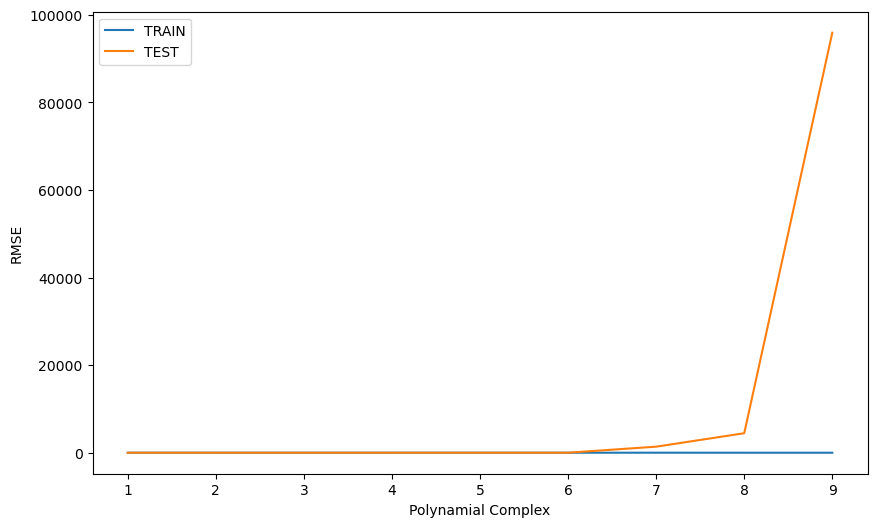

In [57]:
# draw a graph for above results to see explode point:

plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

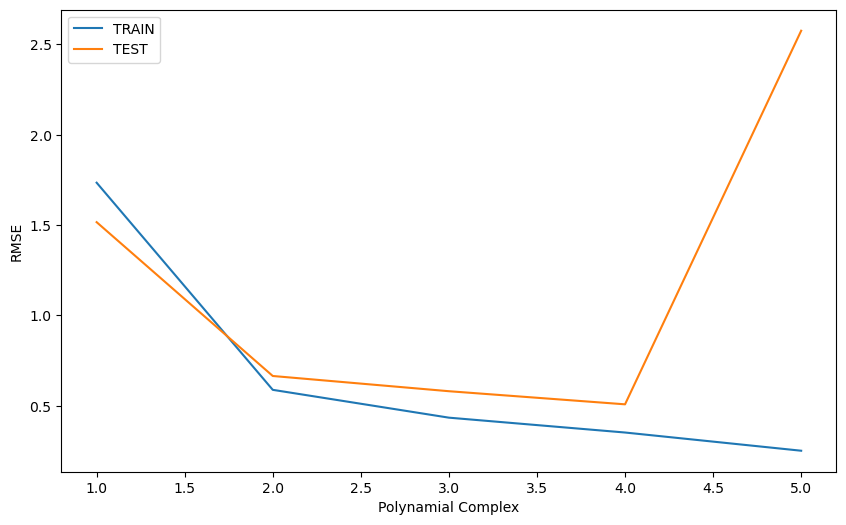

In [58]:
# zoom to graph

plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

In [60]:
# real explode initial at 4 but confidence explode point is 3. So 3rd degree is optimum degree.

# **10. Final Model**

In [61]:
final_poly_conv = PolynomialFeatures(degree=3, include_bias=False)

In [62]:
final_model = LinearRegression()

In [63]:
final_model.fit(final_poly_conv.fit_transform(X), y)

LinearRegression()

# **11. Prediction** 

In [64]:
new_record = [[150,20,15]]

In [65]:
new_record_poly = final_poly_conv.fit_transform(new_record)

In [66]:
new_record_poly

array([[    150.,      20.,      15.,   22500.,    3000.,    2250.,
            400.,     300.,     225., 3375000.,  450000.,  337500.,
          60000.,   45000.,   33750.,    8000.,    6000.,    4500.,
           3375.]])

In [67]:
final_model.predict(new_record_poly)

array([14.25])

# **12. Overfitting Implementation**

In [71]:
over_poly_converter = PolynomialFeatures(degree=5, include_bias=False)

In [72]:
over_model = LinearRegression()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [74]:
over_model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred_over = over_model.predict(X_test)

In [76]:
eval_metric(y_test, y_pred_over)

Model testing performance:
--------------------------
R2_score 	: 0.7649888518703625
MAE 		: 0.6659574891491746
MSE 		: 6.634873249711867
RMSE 		: 2.5758247707699113


In [77]:
y_train_over = over_model.predict(X_train)

In [78]:
eval_metric(y_train, y_train_over)

Model testing performance:
--------------------------
R2_score 	: 0.9976072484653282
MAE 		: 0.18621400407821548
MSE 		: 0.06296802050706767
RMSE 		: 0.2509342951990972
